In [37]:
#Necessary so that each cell can produce multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 4.1.1: Getting Started with Pandas
***
 - Learn how to use __Pandas Series__
 - Learn how to use __Pandas Dataframes__

Scotch Whiskey:
- prized for complexity and flavors
- Regions where it's produced are believed to have distinct flavor profiles

In this case study, we classify Scotch whiskeys based on flavor 

Use Pandas, NumPy, scikit-learn, Bokeh
 

This dataset consists of tasting ratings of readily available, single-malt, scotch whiskey from almost every active distillery in Scotland
- 86 malt whiskies rated between 0 and 4 in 12 different categories, ranked by 10 different tasters

Let's first look at series in Pandas

In [38]:
import pandas as pd
x = pd.Series([6,3,8,6])
x

0    6
1    3
2    8
3    6
dtype: int64

Since we didn't specify an index, Pandas is using the default index (a series of integers starting at 0 and increasing one by one for each subsequent row). 

Now let's specify an index explicitly

In [39]:
x = pd.Series([6,3,8,6], index = ['q','w','e','r'])
x

q    6
w    3
e    8
r    6
dtype: int64

You can use the index to specify values or a list of values. 
- EX: if you wanted to look up the value of 'w' you could do:

In [40]:
x['w']

3

If we want multiple entries, we construct a list of the entries we're interested in:

In [41]:
x[['r', 'w']]

r    6
w    3
dtype: int64

Many ways to construct a series object in Pandas: a common way is by passing a dictionary:

In [42]:
age = {'Tim':29, 'Jim':31, 'Pam':27, 'Sam':35}
x=pd.Series(age)
x

Tim    29
Jim    31
Pam    27
Sam    35
dtype: int64

Note that the index is the keys of the dictionary in order, and the values are the values

Now let's take a look at Dataframes:
- Represent table-like data and have __row__ and __column__ indices
- Like with series, there are many ways to construct a dataframe
    - A common way is by passing a dictionary where the value objects are lists/Numpy Arrays of equal lengths:
    

In [43]:
data = {'name':['Tim', 'Jim', 'Pam', 'Sam'],
        'age':[29,31,27,35],
        'ZIP':['02115', '02130', '67700', '00100']}
x = pd.DataFrame(data, columns = ['name', 'age', 'ZIP'])
x

name  age    ZIP
0  Tim   29  02115
1  Jim   31  02130
2  Pam   27  67700
3  Sam   35  00100

To retrieve a column, we can use dictionary-like notation, or specify the name of the column as an attribute of the DataFrame

In [44]:
x['name']
x.name

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object

We often need to reindex a series or a dataframe object. This does not affect the relationship between the index and the corresponding data, it reorders the data in the object

In [45]:
x = pd.Series([6,3,8,6], index = ['q','w','e','r'])
x
x.index

#Let's take the index and construct a new python list 
print('Reindexed:')
x.reindex(sorted(x.index))

q    6
w    3
e    8
r    6
dtype: int64

Index(['q', 'w', 'e', 'r'], dtype='object')

Reindexed:


e    8
q    6
r    6
w    3
dtype: int64

Pandas supports arithmetic operations. The data alignment happens by index (entries that have the same index are added together).
If the indices do not match, Pandas introduces a NAN (not a number) object

In [46]:
x = pd.Series([6,3,8,6], index = ['q','w','e','r'])
y = pd.Series([7,3,5,2], index = ['e','q','r','t'])
x
y
x+y

q    6
w    3
e    8
r    6
dtype: int64

e    7
q    3
r    5
t    2
dtype: int64

e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64

Both dataframes had e, q, and r but only one of each had t and w. This is why they have NaN entries for those indices.  

## 4.1.2: Loading and Inspecting Data
***
 - Learn how to __load a CSV__ file using Pandas
 - Learn how to __view the beginning and end__ of a Pandas DataFrame
 - Learn how to __index__ a Pandas DataFrame by location
 

In [47]:
import numpy as np
import pandas as pd

whisky = pd.read_csv('https://courses.edx.org/assets/courseware/v1/1153839555bf414586310c9098e4aae1/asset-v1:HarvardX+PH526x+1T2020+type@asset+block/whiskies.txt')
whisky['Regions'] = pd.read_csv('https://courses.edx.org/assets/courseware/v1/c47e706fa1c4d367c99e27a275050678/asset-v1:HarvardX+PH526x+1T2020+type@asset+block/regions.txt')

#Or using local paths
# whisky = pd.read_csv('/Users/ashishsrivastava/Desktop/Central/Python/HarvardX_PH526x/week_4/week_4_case_studies/4.1_whiskey_classification/whiskies.txt')
# whisky['Regions'] = pd.read_csv('/Users/ashishsrivastava/Desktop/Central/Python/HarvardX_PH526x/week_4/week_4_case_studies/4.1_whiskey_classification/regions.txt')


In [48]:
whisky.head()
whisky.tail()

RowID Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  \
0      1  Aberfeldy     2          2      2          0        0      2      1   
1      2   Aberlour     3          3      1          0        0      4      3   
2      3     AnCnoc     1          3      2          0        0      2      0   
3      4     Ardbeg     4          1      4          4        0      0      2   
4      5    Ardmore     2          2      2          0        0      1      1   

   Winey  Nutty  Malty  Fruity  Floral     Postcode   Latitude   Longitude  \
0      2      2      2       2       2   \tPH15 2EB     286580      749680   
1      2      2      3       3       2   \tAB38 9PJ     326340      842570   
2      0      2      2       3       2    \tAB5 5LI     352960      839320   
3      0      1      2       1       0   \tPA42 7EB     141560      646220   
4      1      2      3       1       1   \tAB54 4NH     355350      829140   

     Regions  
0  Highlands  
1   Speyside  
2  Highlands  
3      Islay  
4  Highlands

RowID    Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  \
81     82     Tobermory     1          1      1          0        0      1   
82     83       Tomatin     2          3      2          0        0      2   
83     84     Tomintoul     0          3      1          0        0      2   
84     85       Tormore     2          2      1          0        0      1   
85     86  Tullibardine     2          3      0          0        1      0   

    Spicy  Winey  Nutty  Malty  Fruity  Floral   Postcode   Latitude  \
81      0      0      1      2       2       2   PA75 6NR     150450   
82      2      1      1      2       0       1   IV13 7YT     279120   
83      2      1      1      2       1       2   AB37 9AQ     315100   
84      0      1      2      1       0       0   PH26 3LR     315180   
85      2      1      1      2       2       1    PH4 1QG     289690   

     Longitude    Regions  
81      755070    Islands  
82      829630  Highlands  
83      825560   Speyside  
84      834960   Speyside  
85      708850  Highlands

We can use the iloc method to index a DataFrame by location:

In [49]:
#Rows from 0 to 10 (shows rows 0 through 9)
whisky.iloc[0:10]

RowID    Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  \
0      1     Aberfeldy     2          2      2          0        0      2   
1      2      Aberlour     3          3      1          0        0      4   
2      3        AnCnoc     1          3      2          0        0      2   
3      4        Ardbeg     4          1      4          4        0      0   
4      5       Ardmore     2          2      2          0        0      1   
5      6   ArranIsleOf     2          3      1          1        0      1   
6      7  Auchentoshan     0          2      0          0        0      1   
7      8     Auchroisk     2          3      1          0        0      2   
8      9      Aultmore     2          2      1          0        0      1   
9     10      Balblair     2          3      2          1        0      0   

   Spicy  Winey  Nutty  Malty  Fruity  Floral     Postcode   Latitude  \
0      1      2      2      2       2       2   \tPH15 2EB     286580   
1      3      2      2      3       3       2   \tAB38 9PJ     326340   
2      0      0      2      2       3       2    \tAB5 5LI     352960   
3      2      0      1      2       1       0   \tPA42 7EB     141560   
4      1      1      2      3       1       1   \tAB54 4NH     355350   
5      1      1      0      1       1       2     KA27 8HJ     194050   
6      1      0      2      2       3       3      G81 4SJ     247670   
7      1      2      2      2       2       1   \tAB55 3XS     340754   
8      0      0      2      2       2       2   \tAB55 3QY     340754   
9      2      0      2      1       2       1   \tIV19 1LB     270820   

    Longitude    Regions  
0      749680  Highlands  
1      842570   Speyside  
2      839320  Highlands  
3      646220      Islay  
4      829140  Highlands  
5      649950    Islands  
6      672610   Lowlands  
7      848623   Speyside  
8      848623   Speyside  
9      885770  Highlands

We can use the same method to look at specific columns and specific rows

In [50]:
#Rows from 5->10 and columns from 0->5
whisky.iloc[5:10,0:5]

RowID    Distillery  Body  Sweetness  Smoky
5      6   ArranIsleOf     2          3      1
6      7  Auchentoshan     0          2      0
7      8     Auchroisk     2          3      1
8      9      Aultmore     2          2      1
9     10      Balblair     2          3      2

Some of the columns correspond to whisky flavor attributes

In [51]:
whisky.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Regions'],
      dtype='object')

We want to look at all of the columns starting from Body and ending with Floral (inclusive)

In [52]:
flavors = whisky.iloc[:, 2:14]
flavors

Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0      2          2      2          0        0      2      1      2      2   
1      3          3      1          0        0      4      3      2      2   
2      1          3      2          0        0      2      0      0      2   
3      4          1      4          4        0      0      2      0      1   
4      2          2      2          0        0      1      1      1      2   
..   ...        ...    ...        ...      ...    ...    ...    ...    ...   
81     1          1      1          0        0      1      0      0      1   
82     2          3      2          0        0      2      2      1      1   
83     0          3      1          0        0      2      2      1      1   
84     2          2      1          0        0      1      0      1      2   
85     2          3      0          0        1      0      2      1      1   

    Malty  Fruity  Floral  
0       2       2       2  
1       3       3       2  
2       2       3       2  
3       2       1       0  
4       3       1       1  
..    ...     ...     ...  
81      2       2       2  
82      2       0       1  
83      2       1       2  
84      1       0       0  
85      2       2       1  

[86 rows x 12 columns]

## 4.1.3: Exploring Correlations
***
- Learn how to __explore correlations__ in your data
- Learn how to __plot a correlation matrix__

Now we want to find the correlations of different flavor attributes (ex: do whiskeys that score high on sweetness also score high on honey?)

We'll use the .corr() function that uses __Pearson Correlation__ by default, which estimates linear correlation in data
- If you have measured attributes for two variables (x,y) the pearson correlation coefficient between x and y approaches 1 as the points in the x-y scatterplot approach a straight upward line


What is the interpretation of a correlation coefficient in this specific context? 
- Large, (+), correlation coefficients indicate that the two flavor attributes in question have to increase or decrease together

Let's compute the pairwise correlation of columns in our flavors dataframe


In [53]:
corr_flavors = flavors.corr()
print(corr_flavors)

Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     Winey     Nutty

Now let's graph it using matplotlib

<Figure size 720x720 with 0 Axes>

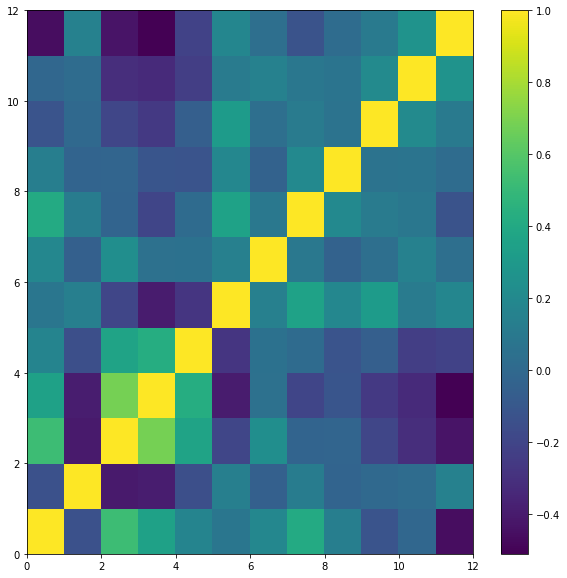

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#Use the pseudocolor function to plot the correlation matrix
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig('corr_flavors.pdf')

Note that the correlation of any attribute with itself is +1.0, but there are also other strong correlations:
- Heavy body associated with smokiness
- Floral is opposite of full bodied/medicinal

We can also look at the correlation of whiskies across flavors by __transposing__ our table
- This is also the correlation between different distilieries in terms of the flavor profiles of the different whiskies they produce



<Figure size 720x720 with 0 Axes>

(0.0, 86.0, 0.0, 86.0)

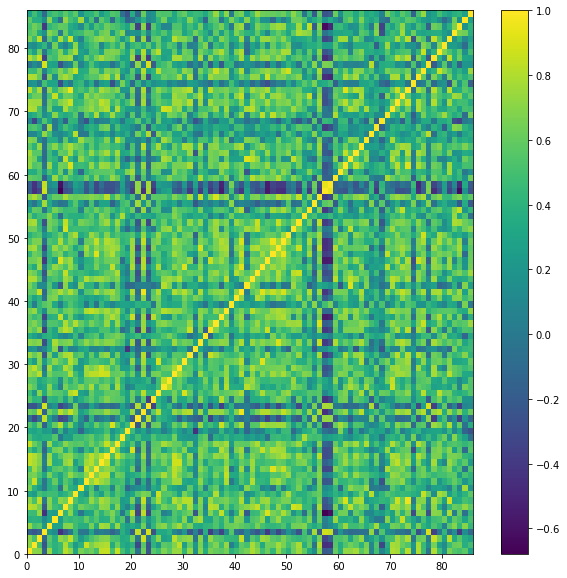

In [55]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
#No whitespace: the axes are only as long as the data
plt.axis('tight')
plt.colorbar()
plt.savefig('corr_whisky.pdf')

## 4.1.4: Clustering Whiskies by Flavor Profile
***
 - Learn how to use __spectral co-clustering__ to cluster whiskies based on their flavor profiles

In [56]:
from sklearn.cluster.bicluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters = 6, random_state = 0)
model.fit(corr_whisky)
model.rows_

SpectralCoclustering(n_clusters=6, random_state=0)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False,  True, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, Fals

The output is an array with the following dimensions: number of row clusters by number of rows in the correlation matrix

Each row in this array corresponds to a cluster (0->5), and each column identifies a row in the correlation matrix (0->85)

If we sum all of the colums of this array, we can find out how many observations belong to each cluster:

In [57]:
# axis = 0 is rows, 1 is columns
np.sum(model.rows_, axis = 1)

array([ 5, 20, 19,  6, 19, 17])

The output tells us how many whiskies belong to cluster 0,1,2,3,4,5

If we sum all of the rows, we can find out how many clusters belong to each observation. Because each observation belongs in just one of the clusters, the answer should be one for all of them, but let's check it to be sure


In [58]:
np.sum(model.rows_, axis = 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let's look at the row_labels_ in our model. How do we interpret the output here?
Observation 0 belongs to cluster 2, obs 1 belongs to 4, etc.

In [59]:
model.row_labels_

array([2, 4, 5, 3, 2, 1, 5, 4, 2, 5, 4, 1, 2, 1, 2, 2, 1, 2, 1, 0, 5, 3,
       5, 3, 5, 5, 4, 4, 5, 4, 5, 2, 1, 1, 1, 2, 4, 5, 1, 0, 1, 5, 4, 4,
       4, 1, 2, 1, 1, 5, 5, 4, 4, 4, 1, 0, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4,
       0, 2, 0, 1, 4, 2, 1, 2, 4, 2, 5, 3, 2, 5, 1, 5, 4, 1, 4, 1],
      dtype=int32)

## 4.1.5: Comparing Correlation Matrices
***
 - Learn how to __compare correlation matrices__

Let's draw the clusters we discovered in our whisky dataframe, and rename the indices to match the sorting

In [60]:
#Extract the group labels from the model and append it to the whisky tabel, specifying their index explicitly
whisky['Group'] = pd.Series(model.row_labels_, index = whisky.index)

#Reorder the rows in increasing order by group labels (that we discovered using spectral cocluster)
whisky = whisky.iloc[np.argsort(model.row_labels_)]

#Reset the index of our dataframe
whisky = whisky.reset_index(drop = True)

We've reshuffled the rows and columns so let's recalculate the correlation matrix, and turn it into a NumPy array. We want it as a np array rather than the dataframe that pandas returns


In [61]:
correlations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())
correlations = np.array(correlations)

Now we can use the pcolor function to visualize it. Our original correlation matrix was corr_whisky, and the new one is called correlations

<Figure size 1008x504 with 0 Axes>

Text(0.5, 1.0, 'Original')

(0.0, 86.0, 0.0, 86.0)

Text(0.5, 1.0, 'Rearranged')

(0.0, 86.0, 0.0, 86.0)

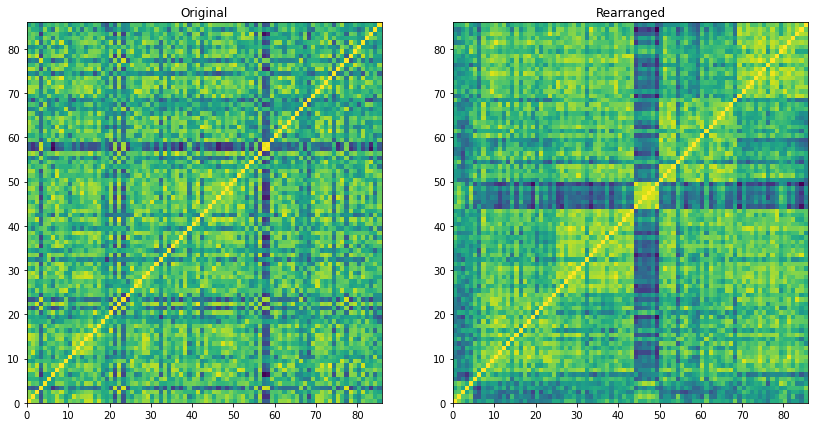

In [66]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title('Original')
plt.axis('tight')
plt.subplot(122)
plt.pcolor(correlations)
plt.title('Rearranged')
plt.axis('tight')
plt.savefig('correlations.pdf')

If you follow the diagonal yellow line from the bottom left to the top right, you can see the 6 blocks. You can expect whiskies that belong to the same plot to have similar flavor profiles

In [68]:
# Consider the following code: What does data[0] return? Why?
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data[0]
# 1: data.ix alters the order of appearance, but leaves the indices the same.

1

In [72]:
# Consider the following code: What does data[0] return? Why?
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
data = data.reset_index(drop=True)
data[0]
# 4: The 0th index of the data has been reordered to index 3 of the original, which is 4.


4